# South African Language Identification Hack 2022

Honour Code I Odiaka Chinonso, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Loading the dataset

In [2]:
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [3]:
#having a look at our test dataset
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [4]:
#having a look at our train dataset
train_df.head(40)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


### Exploratory Data Analysis

In [5]:
train_df.shape

(33000, 2)

33000 rows and 2 columns

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


only object datatypes

In [7]:
train_df.isnull().sum()

lang_id    0
text       0
dtype: int64

No null values

##### Variable Assignments

In [8]:
X = train_df['text']
y = train_df['lang_id']

In [9]:
Xhosa = train_df[y == "xho"]
English = train_df[y == "eng"]
Nso = train_df[y == "nso"]
Venda = train_df[y == "ven"]
Tswana = train_df[y == "tsn"]
Ndebele = train_df[y == "nbl"]
Zulu = train_df[y == "zul"]
Swati = train_df[y == "ssw"]
Tsonga = train_df[y == "tso"]
Sotho = train_df[y == "sot"]
Afrikaans = train_df[y == "afr"]

The 11 official languages in South Africa labeled above. "Nso" stands for Northern Sotho

Now let us see the distribution of our languages

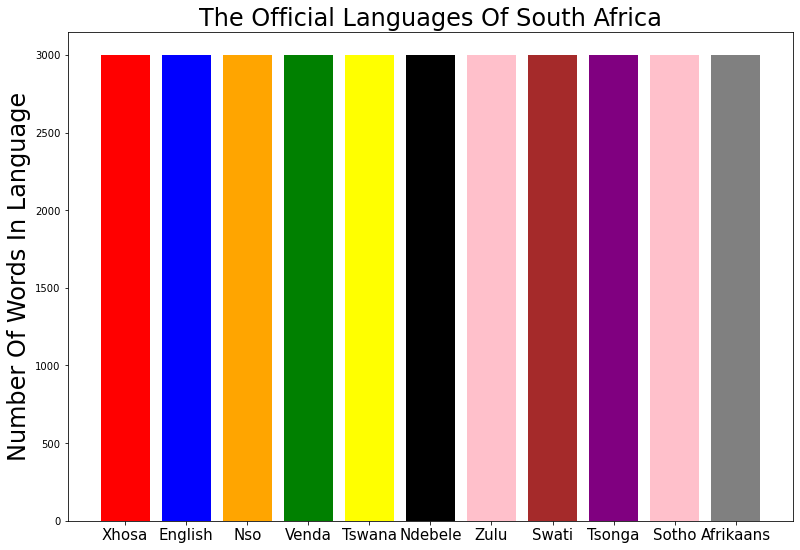

In [10]:
plt.figure(figsize=(13,9))
labels = y.unique()
heights = [len(Xhosa),len(English),len(Nso),len(Venda), len(Tswana), len(Ndebele), len(Zulu), len(Swati), len(Tsonga), len(Sotho), len(Afrikaans)]
plt.bar(labels,heights,color= ["red", "blue", "orange", "green", "yellow", "black", "pink", "brown", "purple", "pink", "grey"])
plt.xticks(labels,['Xhosa', 'English', 'Nso', 'Venda', 'Tswana', 'Ndebele', 'Zulu', 'Swati', 'Tsonga', 'Sotho', 'Afrikaans'])
plt.ylabel("No of Observations")
plt.title("The Official Languages Of South Africa", fontsize = 24)
plt.ylabel("Number Of Words In Language", fontsize = 24)
plt.xticks(labels,['Xhosa', 'English', 'Nso', 'Venda', 'Tswana', 'Ndebele', 'Zulu', 'Swati', 'Tsonga', 'Sotho', 'Afrikaans'], fontsize = 15)
plt.show()

Clearly, the dataset is perfectly sampled. No risk of overfitting the model. Let's observe this in percentage proportions

In [11]:
temp = train_df.groupby('lang_id').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp['percentage'] = round((temp['text']/temp['text'].sum())*100,2) #checking for tweet sentiment percetage
temp.style.background_gradient(cmap='icefire')

,lang_id,text,percentage
0,afr,3000,9.090000
1,eng,3000,9.090000
2,nbl,3000,9.090000
3,nso,3000,9.090000
4,sot,3000,9.090000
5,ssw,3000,9.090000
6,tsn,3000,9.090000
7,tso,3000,9.090000
8,ven,3000,9.090000
9,xho,3000,9.090000


In [12]:
#number of train duplicates
#train_df['text'].duplicated().sum()

In [13]:
#remove train duplicates
#train_df.drop_duplicates(inplace = True)
#train_df['text'].duplicated().sum()

Density Curve

<AxesSubplot:title={'center':'Density curve'}, xlabel='text', ylabel='Density'>

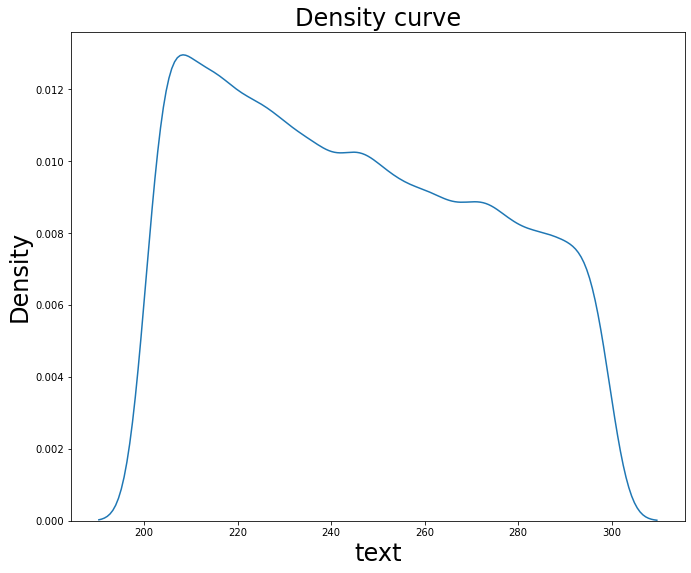

In [14]:
plt.figure(figsize=(11,9))
length = train_df["text"].str.len()
plt.title("Density curve", fontsize = 24)
plt.xlabel("text", fontsize = 24)
plt.ylabel("Density", fontsize = 24)
sns.kdeplot(length)

In [15]:
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Xhosa = train_df[train_df["text"] == "xho"]
#English = train_df[train_df["text"] == "eng"]
#Nso = train_df[train_df["text"] == "nso"]
#Venda = train_df[train_df["text"] == "ven"]
#Tswana = train_df[train_df["text"] == "tsn"]
#Ndebele = train_df[train_df["text"] == "nbl"]
#Zulu = train_df[train_df["text"] == "zul"]
#Swati = train_df[train_df["text"] == "ssw"]
#Tsonga = train_df[train_df["text"] == "tso"]
#Sotho = train_df[train_df["text"] == "sot"]
#Afrikaans = train_df[train_df["text"] == "afr"]
#text_All = " ".join(review for review in train_df.text)
#text_Xhosa = " ".join(review for review in Xhosa.text)
#text_English = " ".join(review for review in English.text)
#text_Nso = " ".join(review for review in Nso.text)
#text_Venda = " ".join(review for review in Venda.text)
#text_Tswana = " ".join(review for review in Tswana.text)
#text_Ndebele = " ".join(review for review in Ndebele.text)
#text_Zulu = " ".join(review for review in Zulu.text)
#text_Swati = " ".join(review for review in Swati.text)
#text_Tsonga = " ".join(review for review in Tsonga.text)
#text_Sotho = " ".join(review for review in Sotho.text)
#text_Afrikaans = " ".join(review for review in Afrikaans.text)

#fig, ax = plt.subplots(5, 1, figsize=(65, 65))

#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100,
                          #background_color="white").generate(text_All)

#wordcloud_Xhosa = WordCloud(max_font_size=50, max_words=100,
                        #background_color="white").generate(text_Xhosa)

#wordcloud_English = WordCloud(max_font_size=50, max_words=100,
                        #background_color="white").generate(text_English)

#wordcloud_Nso = WordCloud(max_font_size=50, max_words=100,
                           #background_color="white").generate(text_Nso)

#wordcloud_Venda = WordCloud(max_font_size=50, max_words=100,
                        #background_color="white").generate(text_Venda)

#wordcloud_Tswana = WordCloud(max_font_size=50, max_words=100,
                        #background_color="white").generate(text_Tswana)

#wordcloud_Ndebele = WordCloud(max_font_size=50, max_words=100,
                        #background_color="white").generate(text_Ndebele)

#wordcloud_Zulu = WordCloud(max_font_size=50, max_words=100,
                        #background_color="white").generate(text_Zulu)

#wordcloud_Swati = WordCloud(max_font_size=50, max_words=100,
                       # background_color="white").generate(text_Swati)

#wordcloud_Tsonga = WordCloud(max_font_size=50, max_words=100,
                       # background_color="white").generate(text_Tsonga)

#wordcloud_Sotho = WordCloud(max_font_size=50, max_words=100,
                        #background_color="white").generate(text_Sotho)

#wordcloud_Afrikaans = WordCloud(max_font_size=50, max_words=100,
                       # background_color="white").generate(text_Afrikaans)

#ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
#ax[0].set_title('All Texts', fontsize=50)
#ax[0].axis('off')
#ax[1].imshow(wordcloud_Xhosa, interpolation='bilinear')
#ax[1].set_title('Xhosa', fontsize=50)
#ax[1].axis('off')
#ax[2].imshow(wordcloud_English, interpolation='bilinear')
#ax[2].set_title('English', fontsize=50)
#ax[2].axis('off')
#ax[3].imshow(wordcloud_Nso, interpolation='bilinear')
#ax[3].set_title('Nso', fontsize=50)
#ax[3].axis('off')
#ax[4].imshow(wordcloud_Venda, interpolation='bilinear')
#ax[4].set_title('Venda', fontsize=50)
#ax[4].axis('off')
#ax[5].imshow(wordcloud_Tswana, interpolation='bilinear')
#ax[5].set_title('Tswana', fontsize=50)
#ax[5].axis('off')
#ax[6].imshow(wordcloud_Ndebele, interpolation='bilinear')
#ax[6].set_title('Ndebele', fontsize=50)
#ax[6].axis('off')
#ax[7].imshow(wordcloud_Zulu, interpolation='bilinear')
#ax[7].set_title('Zulu', fontsize=50)
#ax[7].axis('off')
#ax[8].imshow(wordcloud_Swati, interpolation='bilinear')
#ax[8].set_title('Swati', fontsize=50)
#ax[8].axis('off')
#ax[9].imshow(wordcloud_Tsonga, interpolation='bilinear')
#ax[9].set_title('Tsonga', fontsize=50)
#ax[9].axis('off')
#ax[10].imshow(wordcloud_Sotho, interpolation='bilinear')
#ax[10].set_title('Sotho', fontsize=50)
#ax[10].axis('off')
#ax[11].imshow(wordcloud_Afrikaans, interpolation='bilinear')
#ax[11].set_title('Afrikaans', fontsize=50)
#ax[11].axis('off')

### Data Engineering

Data cleaning: changing to lowercase, removing punctuations, and removing numbers

In [16]:
# Make text lowercase        
text = str(train_df["text"]).lower()

import re
import string
def cleaning(text):

# remove @user, #word and link
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
# remove punctuation    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
# remove numbers    
    text = ''.join([i for i in text[:] if not i.isdigit()])
    return text

train_df['clean_text']=train_df['text'].apply(lambda x: cleaning(x))
test_df['clean_text']=test_df['text'].apply(lambda x: cleaning(x))

In [17]:
#Let's observe our progress thus far
train_df.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [18]:
test_df.head()

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta


##### Natural Language Processing: Tokenization,Lemmatization

In [19]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
def tokenization(text):
    """
    split the message into token of words
    Returns a token of each word contained in the text(tweet)
    """
    text = word_tokenize(text)
    return text

train_df['tokenized_message'] = train_df['clean_text'].apply(lambda x:
                                                              tokenization
                                                              (x.lower()))
test_df['tokenized_message'] = test_df['clean_text'].apply(lambda x:
                                                            tokenization
                                                            (x.lower()))

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemma_df(text, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in text]
train_df['lemma'] = train_df['tokenized_message'].apply(lemma_df, args=(lemmatizer, ))
for i, t in enumerate(train_df.iloc[5]['tokenized_message']):
    print ('{:20s} --> {:10s}'.format(t, train_df.iloc[5]['lemma'][i]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Odiaka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


dinyaki              --> dinyaki   
i                    --> i         
o                    --> o         
t                    --> t         
e                    --> e         
t                    --> t         
a                    --> a         
go                   --> go        
dirwa                --> dirwa     
gabedi               --> gabedi    
ka                   --> ka        
ngwaga               --> ngwaga    
di                   --> di        
tla                  --> tla       
lebelela             --> lebelela  
diphetogo            --> diphetogo 
t                    --> t         
a                    --> a         
mebaraka             --> mebaraka  
ya                   --> ya        
me                   --> me        
omo                  --> omo       
le                   --> le        
mekgwa               --> mekgwa    
ga                   --> ga        
mmogo                --> mmogo     
le                   --> le        
go                   --> go 

In [21]:
#Let's observe our progress thus far
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi..."
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb..."
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department..."
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m..."
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


In [22]:
test_df.head()

,index,text,clean_text,tokenized_message
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em..."
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]"
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t..."
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta,"[winste, op, buitelandse, valuta]"


Time to de-list our cleaned text: detokenization

In [23]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
def detokenization(text):
    """
    Takes the tokenized text and removes the tokenization
    Returns text that is detokenized
    """
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized_message'] = train_df['tokenized_message'].apply(lambda x:
                                                            detokenization(x))

test_df['detokenized_message'] = test_df['tokenized_message'].apply(lambda x:
                                                          detokenization(x))

In [24]:
#let's see how that looks
train_df.head()

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,"[o, netefat, a, gore, o, ba, file, dilo, ka, m...","[o, netefat, a, gore, o, ba, file, dilo, ka, m...",o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...","[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...",khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [25]:
test_df.head()

,index,text,clean_text,tokenized_message,detokenized_message
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",winste op buitelandse valuta


Comparing the raw text from the data set with what we have now

In [26]:
# creating two new columns in train data
train_df['Num_words_raw'] = train_df['text'].apply(lambda
                                                      x: len(str(x).split()))
train_df['Num_words_clean'] = train_df['clean_text'].apply(
                                                              lambda x:
                                                              len(str(
                                                                  x).split()))

# Difference in Number of word in raw data and clean
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] -
                                        train_df['Num_words_clean'])

# test data frame
test_df['Num_words_raw'] = test_df['text'].apply(lambda
                                                    x: len(str(x).split()))
test_df['Num_words_clean'] = test_df['clean_text'].apply(lambda x:
                                                            len(str(x).split(
                                                            )))


# Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw']
                                       - test_df['Num_words_clean'])

In [27]:
train_df.head(3)

,lang_id,text,clean_text,tokenized_message,lemma,detokenized_message,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,"[umgaqo, siseko, wenza, amalungiselelo, kumazi...","[umgaqo, siseko, wenza, amalungiselelo, kumazi...",umgaqo siseko wenza amalungiselelo kumaziko ax...,24,25,1
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,"[i, dha, iya, kuba, nobulumko, bokubeka, umseb...","[i, dha, iya, kuba, nobulumko, bokubeka, umseb...",i dha iya kuba nobulumko bokubeka umsebenzi na...,31,33,2
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,"[the, province, of, kwazulu, natal, department...","[the, province, of, kwazulu, natal, department...",the province of kwazulu natal department of tr...,37,38,1


In [28]:
test_df.head()

,index,text,clean_text,tokenized_message,detokenized_message,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",Mmasepala fa maemo a a kgethegileng a letlelel...,"[mmasepala, fa, maemo, a, a, kgethegileng, a, ...",mmasepala fa maemo a a kgethegileng a letlelel...,10,10,0
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,"[uzakwaziswa, ngokufaneleko, nakungafuneka, em...",uzakwaziswa ngokufaneleko nakungafuneka eminye...,10,10,0
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,Tshivhumbeo tshi fana na ngano dza vhathu,"[tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]",tshivhumbeo tshi fana na ngano dza vhathu,7,7,0
3,4,Kube inja nelikati betingevakala kutsi titsini...,Kube inja nelikati betingevakala kutsi titsini...,"[kube, inja, nelikati, betingevakala, kutsi, t...",kube inja nelikati betingevakala kutsi titsini...,7,7,0
4,5,Winste op buitelandse valuta.,Winste op buitelandse valuta,"[winste, op, buitelandse, valuta]",winste op buitelandse valuta,4,4,0


In [29]:
temp = train_df.groupby('lang_id').count()['detokenized_message'].reset_index().sort_values(by='detokenized_message',ascending=False)
temp['percentage'] = round((temp['detokenized_message']/temp['detokenized_message'].sum())*100,2) #checking for tweet sentiment percetage
temp.style.background_gradient(cmap='icefire')

,lang_id,detokenized_message,percentage
0,afr,3000,9.090000
1,eng,3000,9.090000
2,nbl,3000,9.090000
3,nso,3000,9.090000
4,sot,3000,9.090000
5,ssw,3000,9.090000
6,tsn,3000,9.090000
7,tso,3000,9.090000
8,ven,3000,9.090000
9,xho,3000,9.090000


Xhosa = train_df[y == "xho"]
English = train_df[y == "eng"]
Nso = train_df[y == "nso"]
Venda = train_df[y == "ven"]
Tswana = train_df[y == "tsn"]
Ndebele = train_df[y == "nbl"]
Zulu = train_df[y == "zul"]
Swati = train_df[y == "ssw"]
Tsonga = train_df[y == "tso"]
Sotho = train_df[y == "sot"]
Afrikaans = train_df[y == "afr"]

from sklearn.utils import resample
Xhosa_downsampled = resample(Xhosa, replace=False,
                           n_samples=len(Ndebele), random_state=27)
# Neutral sample without replacement, match minority class, reproduce results
English_downsampled = resample(English, replace=False,
                           n_samples=len(Ndebele), random_state=27)
# News sample without replacement, match in minority class, reproduce results
Nso_downsampled = resample(Nso, replace=False, 
                            n_samples=len(Ndebele), random_state=27)
Venda_downsampled = resample(Venda, replace=False,
                           n_samples=len(Ndebele), random_state=27)
Tswana_downsampled = resample(Tswana, replace=False,
                           n_samples=len(Ndebele), random_state=27)
Zulu_downsampled = resample(Zulu, replace=False,
                           n_samples=len(Ndebele), random_state=27)
Swati_downsampled = resample(Swati, replace=False,
                           n_samples=len(Ndebele), random_state=27)
Tsonga_downsampled = resample(Tsonga, replace=False,
                           n_samples=len(Ndebele), random_state=27)
Sotho_downsampled = resample(Sotho, replace=False,
                           n_samples=len(Ndebele), random_state=27)
Afrikaans_downsampled = resample(Afrikaans, replace=False,
                           n_samples=len(Ndebele), random_state=27)








# Combine downsampled majority class with minority class
downsampled = pd.concat([Xhosa_downsampled, English_downsampled,
                         Nso_downsampled, Venda_downsampled, Tswana_downsampled, Zulu_downsampled, Swati_downsampled,
                         Tsonga_downsampled, Sotho_downsampled, Afrikaans_downsampled, Ndebele])

down = downsampled.groupby('lang_id').count()['text'].reset_index().sort_values(by='text',ascending=False)
down['percentage'] = round((down['text']/down['text'].sum())*100,0) #checking for tweet sentiment percetage
down.style.background_gradient(cmap='icefire')

X_d = downsampled['detokenized_message']
y = downsampled['lang_id']

In [48]:
train_df= train_df.drop('Num_words_clean', axis=1)
test_df= test_df.drop('Num_words_clean', axis=1)
train_df.head(2)

,lang_id,detokenized_message
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...


In [46]:
train_df.head()

,lang_id,detokenized_message,Num_words_raw,Num_words_clean
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...,24,25
1,xho,i dha iya kuba nobulumko bokubeka umsebenzi na...,31,33
2,eng,the province of kwazulu natal department of tr...,37,38
3,nso,o netefat a gore o ba file dilo ka moka t e le...,40,44
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,43,43


# Modeling

In [49]:
#Assigning variables
X_d = train_df['detokenized_message']
y = train_df['lang_id']

Text to numbers conversion

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#vector = TfidfVectorizer(sublinear_tf=True)
vector = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X =vector.fit_transform(X_d)

Splitting our train dataset

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

Logistic Regression Classifier

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
log_d = LogisticRegression()

log_d.fit(X_train, y_train)

log_d_prediction = log_d.predict(X_test)
log_d_accuracy = accuracy_score(y_test,log_d_prediction)

print("Training accuracy Score    : ",log_d.score(X_train,y_train))
print("Testing accuracy Score : ",log_d_accuracy )
print(classification_report(log_d_prediction,y_test))

Training accuracy Score    :  0.9994822597837674
Testing accuracy Score :  1.0
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00         7
         eng       1.00      1.00      1.00        21
         nbl       1.00      1.00      1.00        12
         nso       1.00      1.00      1.00        15
         sot       1.00      1.00      1.00        15
         ssw       1.00      1.00      1.00        12
         tsn       1.00      1.00      1.00        17
         tso       1.00      1.00      1.00        10
         ven       1.00      1.00      1.00        14
         xho       1.00      1.00      1.00        21
         zul       1.00      1.00      1.00        21

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



C:\Users\Odiaka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF_DS = RandomForestClassifier()

RF_DS.fit(X_train,y_train)

RF_DS_pred = RF_DS.predict(X_test)
RF_DS_accuracy = accuracy_score(y_test,RF_DS_pred)

print("Training accuracy Score    : ",RF_DS.score(X_train,y_train))
print("Testing accuracy Score : ",RF_DS_accuracy )

print(classification_report(RF_DS_pred,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.9939393939393939
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00         7
         eng       1.00      1.00      1.00        21
         nbl       1.00      1.00      1.00        12
         nso       1.00      1.00      1.00        15
         sot       1.00      1.00      1.00        15
         ssw       0.92      1.00      0.96        11
         tsn       1.00      1.00      1.00        17
         tso       1.00      1.00      1.00        10
         ven       1.00      1.00      1.00        14
         xho       1.00      1.00      1.00        21
         zul       1.00      0.95      0.98        22

    accuracy                           0.99       165
   macro avg       0.99      1.00      0.99       165
weighted avg       0.99      0.99      0.99       165



Support Vector Classifier

In [54]:
from sklearn.svm import LinearSVC

lsvc_DS_clf = LinearSVC()

lsvc_DS_clf.fit(X_train,y_train)

lsvc_DS_pred = lsvc_DS_clf.predict(X_test)

lsvc_DS_accuracy = accuracy_score(y_test,lsvc_DS_pred)

print("Training accuracy Score    : ",lsvc_DS_clf.score(X_train,y_train))
print("Testing accuracy Score : ",lsvc_DS_accuracy )

print(classification_report(lsvc_DS_pred,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  1.0
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00         7
         eng       1.00      1.00      1.00        21
         nbl       1.00      1.00      1.00        12
         nso       1.00      1.00      1.00        15
         sot       1.00      1.00      1.00        15
         ssw       1.00      1.00      1.00        12
         tsn       1.00      1.00      1.00        17
         tso       1.00      1.00      1.00        10
         ven       1.00      1.00      1.00        14
         xho       1.00      1.00      1.00        21
         zul       1.00      1.00      1.00        21

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



In [55]:
from sklearn.naive_bayes import MultinomialNB

NB_DS = MultinomialNB()

NB_DS.fit(X_train,y_train)

NB_DS_pred = NB_DS.predict(X_test)

NB_DS_accuracy = accuracy_score(y_test,NB_DS_pred)

print("training accuracy Score: ", NB_DS.score(X_train,y_train))
print("Testing accuracy Score : ", NB_DS_accuracy )

print(classification_report(NB_DS_pred,y_test))

training accuracy Score:  0.9996345363179534
Testing accuracy Score :  1.0
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00         7
         eng       1.00      1.00      1.00        21
         nbl       1.00      1.00      1.00        12
         nso       1.00      1.00      1.00        15
         sot       1.00      1.00      1.00        15
         ssw       1.00      1.00      1.00        12
         tsn       1.00      1.00      1.00        17
         tso       1.00      1.00      1.00        10
         ven       1.00      1.00      1.00        14
         xho       1.00      1.00      1.00        21
         zul       1.00      1.00      1.00        21

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
ada_cl = AdaBoostClassifier(n_estimators=20, learning_rate=2, algorithm="SAMME.R", random_state=42)

ada_cl.fit(X_train , y_train)

# Predictions for Random forest model 
y_pred_ada_cl = ada_cl.predict(X_test)

# Declaring metrics to use in evaluating our model in Comet
accuracy_ada_cl = (ada_cl.score(X_test, y_test))
f1_ada_cl = (metrics.f1_score(y_test, y_pred_ada_cl, average='weighted'))
precision_ada_cl = (metrics.precision_score(y_test, y_pred_ada_cl, average="weighted"))

C:\Users\Odiaka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model comparison based on Test Accuracy Scores

In [70]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression ', 
              'Random Forest', 'Linear SVC', 'Naive Bayes','ada_cl'],
    'Test Accuracy': [ log_d_accuracy, 
              RF_DS_accuracy, lsvc_DS_accuracy, NB_DS_accuracy, accuracy_ada_cl]})

models.sort_values(by='Test Accuracy', ascending=False)

,Model,Test Accuracy
0,Logistic Regression,1.000000
2,Linear SVC,1.000000
3,Naive Bayes,1.000000
1,Random Forest,0.993939
4,ada_cl,0.527273


In [ ]:
px.bar(models, y =models['Test Accuracy'],
       color = models.index, width =700, height=400)

Pefered model is SVC

Testing the prefered model on the test dataset

In [ ]:
X_NB_test = test_df['detokenized_message']
X_test =vector.transform(X_NB_test)

In [ ]:
test_pred = NB_DS.predict(X_test)

test_df['lang_id'] = test_pred

subm = test_df[['index','lang_id']]
subm.to_csv('sub.csv', index=False) 

In [ ]:
subm